In [1]:
import pandas as pd

In [2]:
#open data
df = pd.read_excel('data.xlsx')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


# REMOVING COLUMNS TO SIMPLIFY THE DATA

In [3]:
# Drop columns that have null columns

columns_to_drop = ['ADDRESSLINE2', 'STATE', 'TERRITORY','POSTALCODE']
df = df.drop(columns=columns_to_drop)

In [4]:
# Drop columns that are related to the customer info. we dont really need that.

columns_to_drop = ['ORDERNUMBER','PHONE', 'ADDRESSLINE1','CONTACTLASTNAME','CONTACTFIRSTNAME']
df = df.drop(columns=columns_to_drop)

In [5]:
# Drop columns PRODUCTCODE bc it has the info as PRODUCTLINE

columns_to_drop = ['PRODUCTCODE']
df = df.drop(columns=columns_to_drop)

In [6]:
# Drop columns PRODUCTCODE bc it has the info as PRODUCTLINE

columns_to_drop = ['ORDERDATE']
df = df.drop(columns=columns_to_drop)

# WHAT IF MANAGEMENT ONLY CARES ABOUT $$$

In [7]:
df.columns

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'STATUS',
       'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'CUSTOMERNAME',
       'CITY', 'COUNTRY', 'DEALSIZE'],
      dtype='object')

In [8]:
columns_to_drop = ['ORDERLINENUMBER','STATUS','QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP','CITY', 'COUNTRY','DEALSIZE']
df = df.drop(columns=columns_to_drop)

In [9]:
df

,QUANTITYORDERED,PRICEEACH,SALES,CUSTOMERNAME
0,30,95.70,2871.00,Land of Toys Inc.
1,34,81.35,2765.90,Reims Collectables
2,41,94.74,3884.34,Lyon Souveniers
3,45,83.26,3746.70,Toys4GrownUps.com
4,49,100.00,5205.27,Corporate Gift Ideas Co.
...,...,...,...,...
2818,20,100.00,2244.40,Euro Shopping Channel
2819,29,100.00,3978.51,"Oulu Toy Supplies, Inc."
2820,43,100.00,5417.57,Euro Shopping Channel
2821,34,62.24,2116.16,Alpha Cognac


In [10]:
# Group by 'customer' and calculate the sum for each group
grouped_df = df.groupby('CUSTOMERNAME').sum()

In [11]:
df = grouped_df
df

,QUANTITYORDERED,PRICEEACH,SALES
CUSTOMERNAME,,,
"AV Stores, Co.",1778,3975.33,157807.81
Alpha Cognac,687,1701.95,70488.44
Amica Models & Co.,843,2218.41,94117.26
"Anna's Decorations, Ltd",1469,3843.67,153996.13
Atelier graphique,270,558.43,24179.96
...,...,...,...
"Vida Sport, Ltd",1078,2713.09,117713.56
Vitachrome Inc.,787,2108.11,88041.26
"Volvo Model Replicas, Co",647,1720.14,75754.88


# CHOSING EPSILON

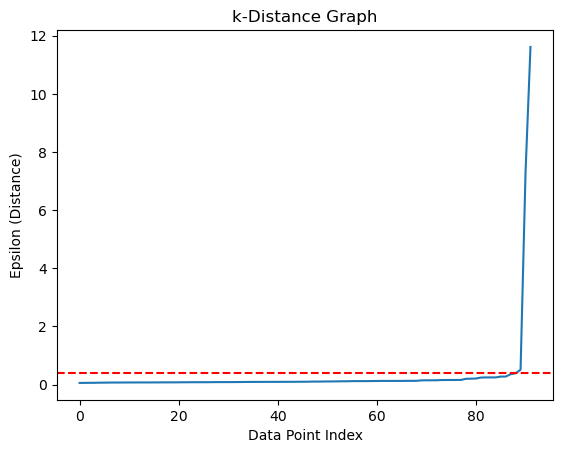

In [12]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



# Assuming you have 'numerical_data' from the previous code
# Extract numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a DataFrame containing only numerical data
numerical_data = df[numerical_columns]

# Standardize the data (mean=0 and variance=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Fit a Nearest Neighbors model to compute distances
neighbors_model = NearestNeighbors(n_neighbors=5)  # You can adjust the number of neighbors
neighbors_model.fit(scaled_data)
distances, _ = neighbors_model.kneighbors(scaled_data)

# Sort the distances
sorted_distances = np.sort(distances[:, -1])

# Plot the k-distance graph
plt.plot(sorted_distances)
plt.axhline(y=0.4, color='red', linestyle='--', label='Threshold at 0.5')  # Add a red line at y = 0.5
plt.xlabel('Data Point Index')
plt.ylabel('Epsilon (Distance)')
plt.title('k-Distance Graph')
plt.show()


# CHOSING THE BEST NUMBERS OF SAMPLES

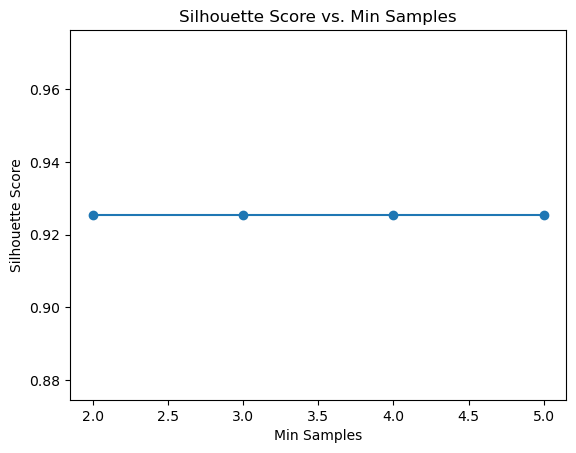

Optimal Min Samples: 2


In [13]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


silhouette_scores = []
min_samples_values = range(2, 6)  # Adjust the range based on your data

for min_samples_val in min_samples_values:
    dbscan = DBSCAN(eps=0.4, min_samples=min_samples_val)
    labels = dbscan.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, labels))

# Plot silhouette scores
plt.plot(min_samples_values, silhouette_scores, marker='o')
plt.xlabel('Min Samples')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Min Samples')
plt.show()

# Choose the min_samples with the highest silhouette score
optimal_min_samples = min_samples_values[np.argmax(silhouette_scores)]
print(f"Optimal Min Samples: {optimal_min_samples}")


# DBSCAN WITH CHOSEN PARAMETERS

Clusters:
 0    90
-1     2
Name: Cluster, dtype: int64


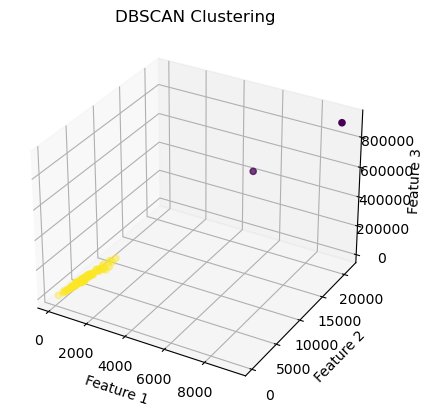

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with numerical data
# If your data contains non-numerical columns, you may need to preprocess them or exclude them from DBSCAN

# Extract numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a DataFrame containing only numerical data
numerical_data = df[numerical_columns]

# Standardize the data (mean=0 and variance=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Choose the epsilon and min_samples based on your analysis
epsilon = 0.4 # Adjust based on your data
min_samples = 2  # Adjust based on your data

# Create a DBSCAN object
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Fit and predict clusters
labels = dbscan.fit_predict(scaled_data)

# Add the cluster labels to the original DataFrame
df['Cluster'] = labels

# Display the clusters
print("Clusters:")
print(df['Cluster'].value_counts())

# Plot the clusters (assuming 2D or 3D data)
if numerical_data.shape[1] == 2:
    plt.scatter(numerical_data.iloc[:, 0], numerical_data.iloc[:, 1], c=labels, cmap='viridis', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('DBSCAN Clustering')
    plt.show()
elif numerical_data.shape[1] == 3:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(numerical_data.iloc[:, 0], numerical_data.iloc[:, 1], numerical_data.iloc[:, 2], c=labels, cmap='viridis', marker='o')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('DBSCAN Clustering')
    plt.show()
else:
    print("Can't visualize clusters for more than 3 dimensions.")


# ADDING THE GROUPS TO THE DF

In [15]:
df

,QUANTITYORDERED,PRICEEACH,SALES,Cluster
CUSTOMERNAME,,,,
"AV Stores, Co.",1778,3975.33,157807.81,0
Alpha Cognac,687,1701.95,70488.44,0
Amica Models & Co.,843,2218.41,94117.26,0
"Anna's Decorations, Ltd",1469,3843.67,153996.13,0
Atelier graphique,270,558.43,24179.96,0
...,...,...,...,...
"Vida Sport, Ltd",1078,2713.09,117713.56,0
Vitachrome Inc.,787,2108.11,88041.26,0
"Volvo Model Replicas, Co",647,1720.14,75754.88,0


# SEE HOW THE CUSTOMERS WERE GROUPED

# NOW YOU CAN SEE THE PROBLEM WITH THE OUTLIERS

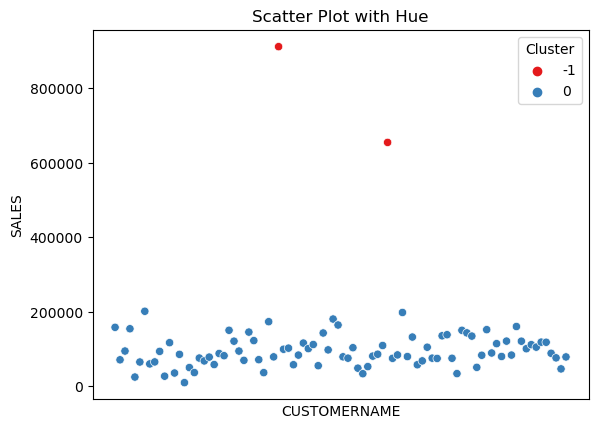

In [16]:
import seaborn as sns

# Scatter plot with hue
sns.scatterplot(x='CUSTOMERNAME', y='SALES', hue='Cluster',palette='Set1', data=df)
# Remove X-axis labels
plt.xticks([])
plt.title('Scatter Plot with Hue')
plt.show()


# FILTER THE OUTLIERS

In [17]:
# Remove rows with 'Cluster' column value equal to -1
df_filtered = df[df['Cluster'] != -1]

In [18]:
df = df_filtered
df

,QUANTITYORDERED,PRICEEACH,SALES,Cluster
CUSTOMERNAME,,,,
"AV Stores, Co.",1778,3975.33,157807.81,0
Alpha Cognac,687,1701.95,70488.44,0
Amica Models & Co.,843,2218.41,94117.26,0
"Anna's Decorations, Ltd",1469,3843.67,153996.13,0
Atelier graphique,270,558.43,24179.96,0
...,...,...,...,...
"Vida Sport, Ltd",1078,2713.09,117713.56,0
Vitachrome Inc.,787,2108.11,88041.26,0
"Volvo Model Replicas, Co",647,1720.14,75754.88,0


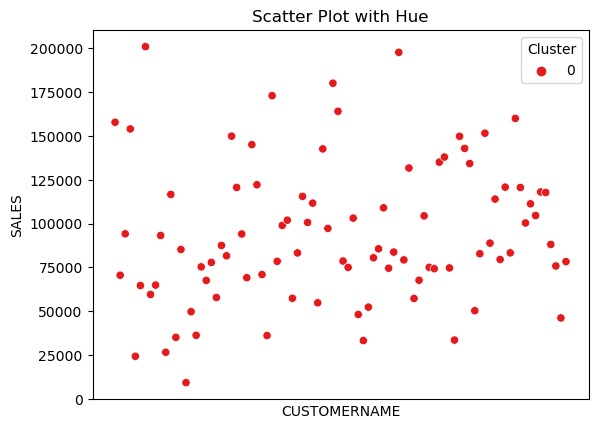

In [19]:
import seaborn as sns

# Scatter plot with hue
sns.scatterplot(x='CUSTOMERNAME', y='SALES', hue='Cluster',palette='Set1', data=df)
# Remove X-axis labels
plt.xticks([])
plt.title('Scatter Plot with Hue')
plt.show()

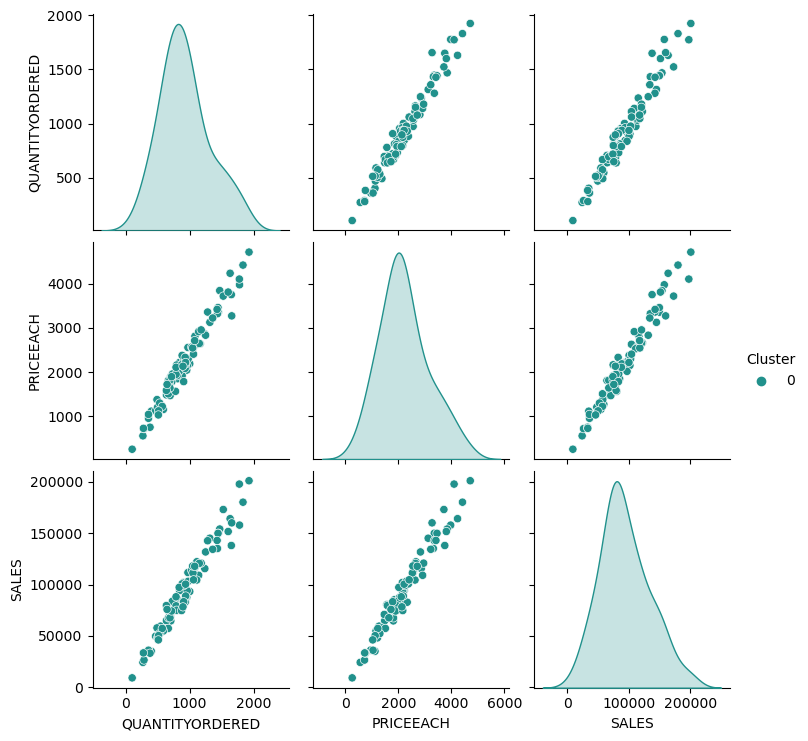

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'hue_column' is the column you want to use as the hue
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()

# ONCE THE OUTLIERS ARE OUT RE DO THE EXPERIMENT

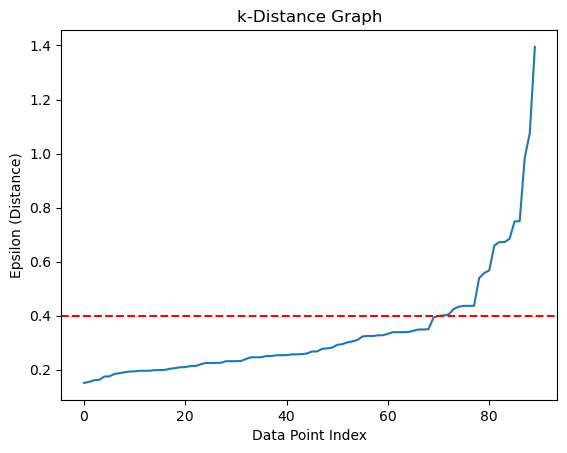

In [21]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



# Assuming you have 'numerical_data' from the previous code
# Extract numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a DataFrame containing only numerical data
numerical_data = df[numerical_columns]

# Standardize the data (mean=0 and variance=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Fit a Nearest Neighbors model to compute distances
neighbors_model = NearestNeighbors(n_neighbors=5)  # You can adjust the number of neighbors
neighbors_model.fit(scaled_data)
distances, _ = neighbors_model.kneighbors(scaled_data)

# Sort the distances
sorted_distances = np.sort(distances[:, -1])

# Plot the k-distance graph
plt.plot(sorted_distances)
plt.axhline(y=0.4, color='red', linestyle='--', label='Threshold at 0.5')  # Add a red line at y = 0.5
plt.xlabel('Data Point Index')
plt.ylabel('Epsilon (Distance)')
plt.title('k-Distance Graph')
plt.show()


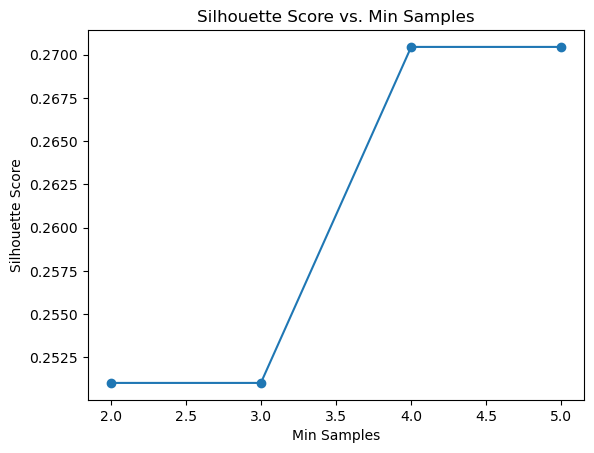

Optimal Min Samples: 4


In [22]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


silhouette_scores = []
min_samples_values = range(2, 6)  # Adjust the range based on your data

for min_samples_val in min_samples_values:
    dbscan = DBSCAN(eps=0.4, min_samples=min_samples_val)
    labels = dbscan.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, labels))

# Plot silhouette scores
plt.plot(min_samples_values, silhouette_scores, marker='o')
plt.xlabel('Min Samples')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Min Samples')
plt.show()

# Choose the min_samples with the highest silhouette score
optimal_min_samples = min_samples_values[np.argmax(silhouette_scores)]
print(f"Optimal Min Samples: {optimal_min_samples}")


In [23]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with numerical data
# If your data contains non-numerical columns, you may need to preprocess them or exclude them from DBSCAN

# Extract numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a DataFrame containing only numerical data
numerical_data = df[numerical_columns]

# Standardize the data (mean=0 and variance=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Choose the epsilon and min_samples based on your analysis
epsilon = 0.4 # Adjust based on your data
min_samples = 4  # Adjust based on your data

# Create a DBSCAN object
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Fit and predict clusters
labels = dbscan.fit_predict(scaled_data)

# Add the cluster labels to the original DataFrame
df['Cluster'] = labels

# Display the clusters
print("Clusters:")
print(df['Cluster'].value_counts())

# Plot the clusters (assuming 2D or 3D data)
if numerical_data.shape[1] == 2:
    plt.scatter(numerical_data.iloc[:, 0], numerical_data.iloc[:, 1], c=labels, cmap='viridis', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('DBSCAN Clustering')
    plt.show()
elif numerical_data.shape[1] == 3:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(numerical_data.iloc[:, 0], numerical_data.iloc[:, 1], numerical_data.iloc[:, 2], c=labels, cmap='viridis', marker='o')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('DBSCAN Clustering')
    plt.show()
else:
    print("Can't visualize clusters for more than 3 dimensions.")


Clusters:
 0    65
-1    11
 1     7
 2     7
Name: Cluster, dtype: int64
Can't visualize clusters for more than 3 dimensions.


C:\Users\castr\AppData\Local\Temp\ipykernel_20392\1299169578.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = labels


In [24]:
df

,QUANTITYORDERED,PRICEEACH,SALES,Cluster
CUSTOMERNAME,,,,
"AV Stores, Co.",1778,3975.33,157807.81,-1
Alpha Cognac,687,1701.95,70488.44,0
Amica Models & Co.,843,2218.41,94117.26,0
"Anna's Decorations, Ltd",1469,3843.67,153996.13,-1
Atelier graphique,270,558.43,24179.96,1
...,...,...,...,...
"Vida Sport, Ltd",1078,2713.09,117713.56,0
Vitachrome Inc.,787,2108.11,88041.26,0
"Volvo Model Replicas, Co",647,1720.14,75754.88,0


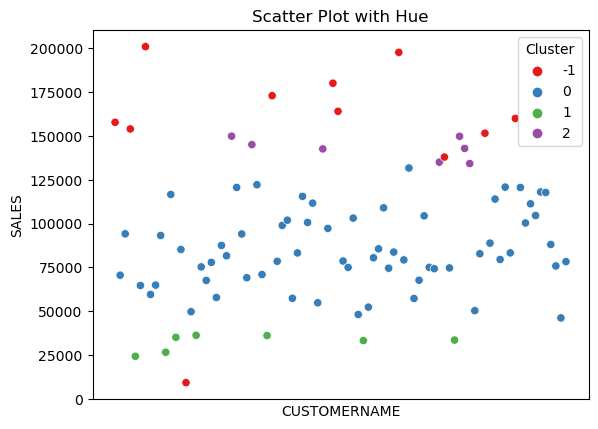

In [25]:
# Scatter plot with hue
sns.scatterplot(x='CUSTOMERNAME', y='SALES', hue='Cluster',palette='Set1', data=df)
# Remove X-axis labels
plt.xticks([])
plt.title('Scatter Plot with Hue')
plt.show()


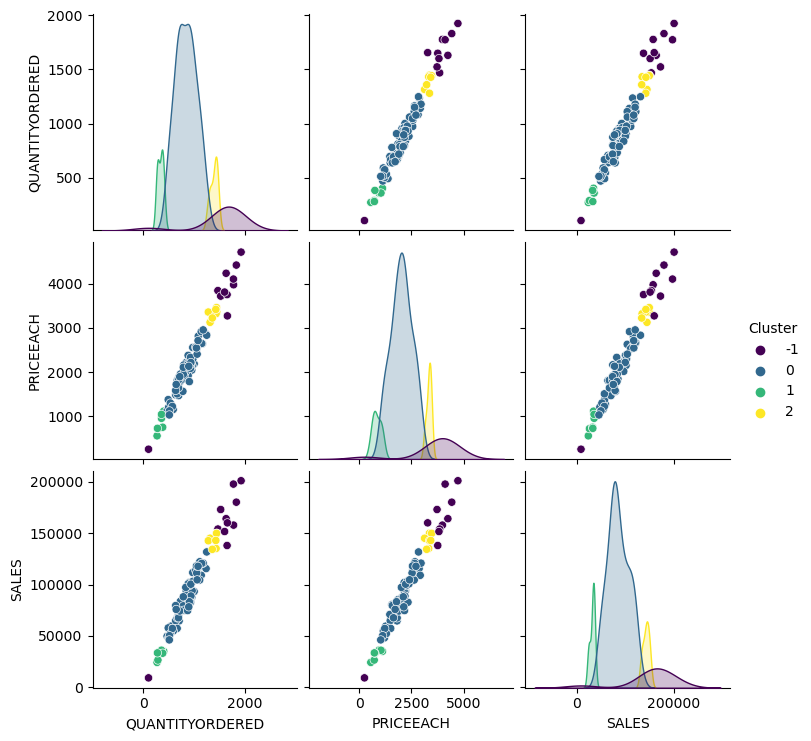

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'hue_column' is the column you want to use as the hue
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()

In [27]:
# Find the index of the row with the lowest value in the 'SALES' column
index_of_min_sales = df['SALES'].idxmin()

# Drop the row with the lowest value
df_without_min_sales = df.drop(index_of_min_sales)

df = df_without_min_sales

# RESULT: WE HAVE 4 DIFFERENT GROUPS OF CUSTOMERS

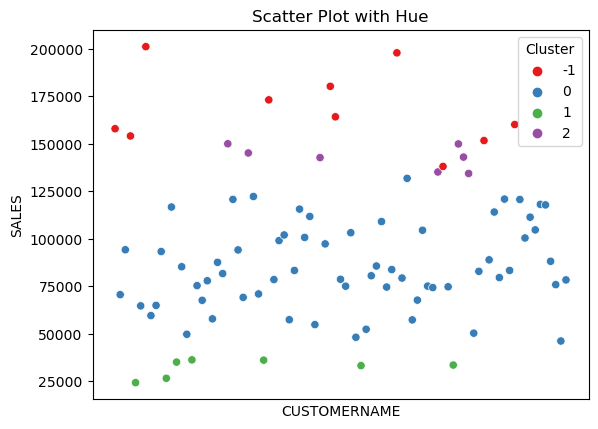

In [28]:
# Scatter plot with hue
sns.scatterplot(x='CUSTOMERNAME', y='SALES', hue='Cluster',palette='Set1', data=df)
# Remove X-axis labels
plt.xticks([])
plt.title('Scatter Plot with Hue')
plt.show()


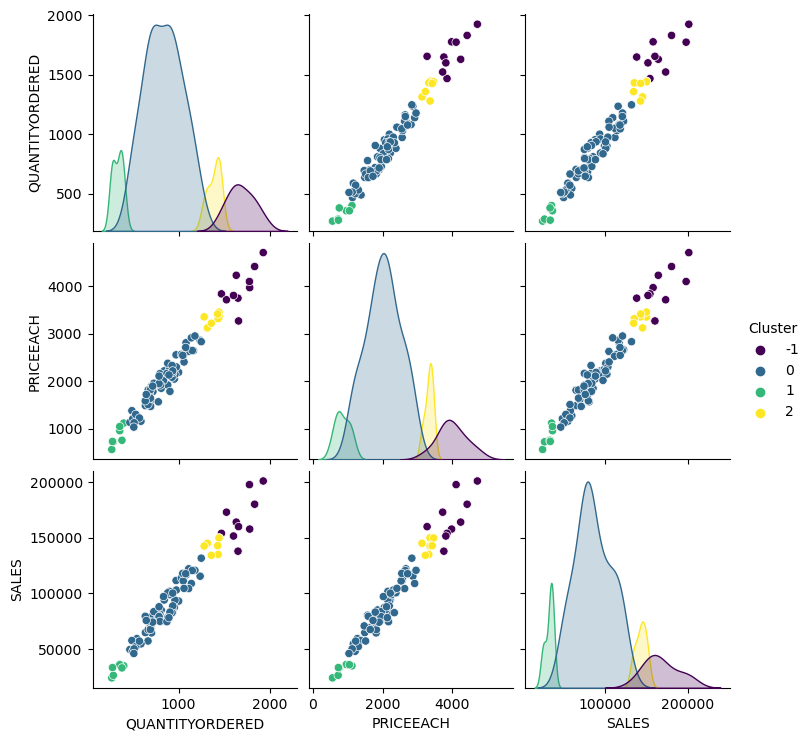

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'hue_column' is the column you want to use as the hue
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()